## Automate: create, detect, write high_res blend 
started: Aug 18th 2020 <br>
edit: Nov 20th 2020


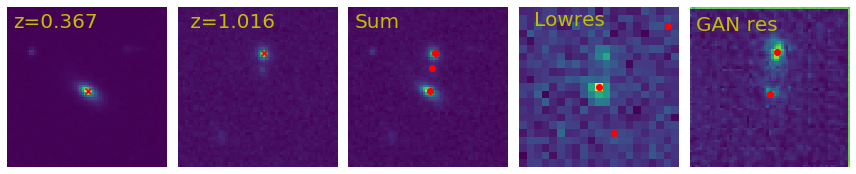

[2, 1, 2]


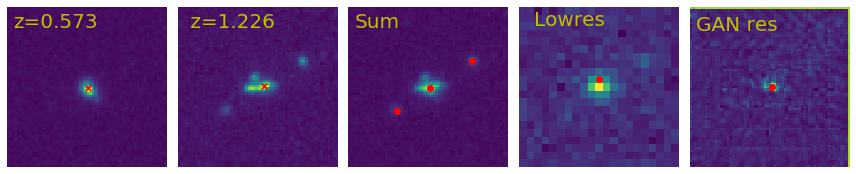

[1, 1, 1]


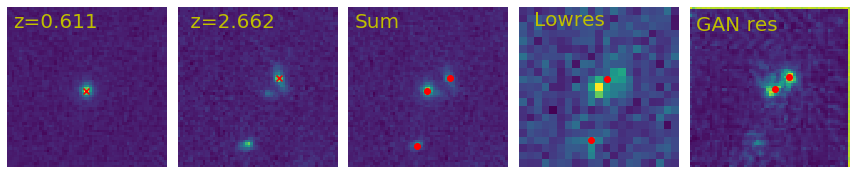

[2, 1, 2]


In [2]:
from galblend import *
%matplotlib inline 

hi,i1,i2,lo,gan,psf_hires,psf_lores,data,nums = galblend(gals=2,lim_hmag=24,plot_it=True)
print(nums)
hi,i1,i2,lo,gan,psf_hires,psf_lores,data,nums = galblend(gals=2,lim_hmag=24,plot_it=True)
print(nums)
hi,i1,i2,lo,gan,psf_hires,psf_lores,data,nums = galblend(gals=2,lim_hmag=24,plot_it=True)
print(nums)

In [3]:
#f = open('photometry_lowres.txt','w+')
#for i in range(len(flux_ref_lores)):
#    f.write(str(flux_lores[i])+'\t'+str(flux_ref_lores[i])+'\n')
#f.close()
#%run photom.py

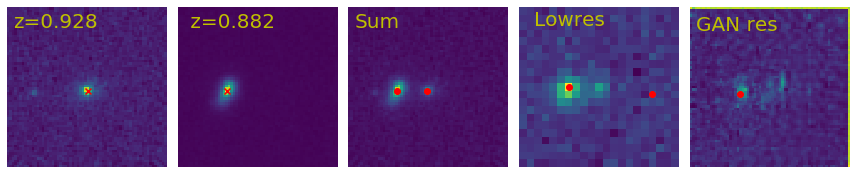

[0.78, array(2.3997557), 0.04600000000000004, 8.05, (2, [19, 32], [30, 30]), (1, [6], [10]), (1, [19], [30])]
[2, 1, 1]


In [4]:
#a,galax,g,data = galblend(gals=2,lim_hmag=25,plot_it=True)
a,i1,i2,galax,g,psf_hires,psf_lores,data,nums = galblend(gals=2,lim_hmag=24,plot_it=True)

x_hi,y_hi = str2coord(str(data[5][0]))
x_low,y_low = str2coord(str(data[5][1]))
x_gan,y_gan = str2coord(str(data[5][2]))
x,y = [data[0][0],data[0][1]],[data[1][0],data[1][1]]
numgan = MatchGan(x,y,x_gan,y_gan)
numhi = MatchGan(x,y,x_hi,y_hi)
numlow = MatchLow(x,y,x_low,y_low)
dis = 0.06*distance (data[0][0],data[0][1],data[1][0],data[1][1])
mag = magdis(data[3][0],data[3][1])
dz = np.abs(data[2][0]-data[2][1])
s = max(data[4][0],data[4][1])
print([dis,mag,dz,s,numhi,numlow,numgan])   
print(nums)

import astropy.io.fits as fits
f = open('blending_data_new_2.txt','w+')

k=0
for i in range(5000):
    a,i1,i2,galax,g,psf_hires,psf_lores,data,nums = galblend(gals=2,lim_hmag=25,plot_it=False)
    x,y = [data[0][0],data[0][1]],[data[1][0],data[1][1]]
    if (len(x)>=2):
        #fits.writeto('images/low_res_'+str(k)+'.fits',lo,overwrite=True)
        #fits.writeto('images/hi_res_'+str(k)+'.fits',hi,overwrite=True)
        f.write(str(k)+'\t'+str(x[0])+'\t'+str(x[1])+'\t'+str(y[0])+'\t'+str(y[1])+'\t'+str(data[2][0])+'\t'+str(data[2][1])+'\t'+str(data[3][0])+
                '\t'+str(data[3][1])+'\t'+str(data[4][0])+'\t'+str(data[4][1])+'\t'+str(nums[0])+'\t'+str(nums[1])+'\t'+str(nums[2])+'\n')
        k+=1
    if k%500==0:
        print(k)
f.close()

In [3]:
import pandas as pd
data = pd.read_csv('blending_data_new_2.txt', sep="\t", header=None)
data.columns = ["id","x1","x2", "y1","y2", "z1","z2", "flux1","flux2","s1","s2","coords_hi","coords_low","coords_gan"]

data2=[]
for boz in range(len(data['x1'])):
    x,y = [data['x1'][boz],data['x2'][boz]],[data['y1'][boz],data['y2'][boz]]
    dis = 0.06*distance (data['x1'][boz],data['x2'][boz],data['y1'][boz],data['y2'][boz])
    mag = magdis(data['flux1'][boz],data['flux2'][boz])
    dz = np.abs(data['z1'][boz]-data['z2'][boz])
    if (0<data['flux1'][boz]<100)&(0<data['flux2'][boz]<100):
        data2.append([dis,data['flux1'][boz],data['flux2'][boz],data['z1'][boz],data['z2'][boz],data['s1'][boz],data['s2'][boz],data['coords_hi'][boz],data['coords_low'][boz],data['coords_gan'][boz]])                                 
df = pd.DataFrame(data2)
df.columns = ["distance", "flux1", "flux2", "z1", "z2", "s1", "s2","numhi" ,"numlow","numgan"]


(array([1.034e+03, 2.204e+03, 1.447e+03, 2.260e+02, 2.400e+01, 8.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([0.        , 0.04004659, 0.08009318, 0.12013977, 0.16018636,
        0.20023295, 0.24027954, 0.28032613, 0.32037272, 0.36041931,
        0.4004659 ]),
 <a list of 10 Patch objects>)

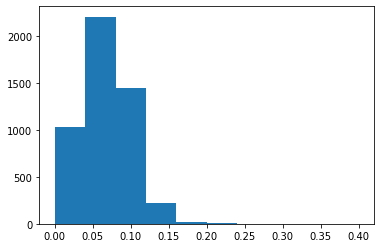

In [4]:
new_par = df['distance']/(np.sqrt(df['s1']**2+df['s2']**2))
plt.hist(new_par)

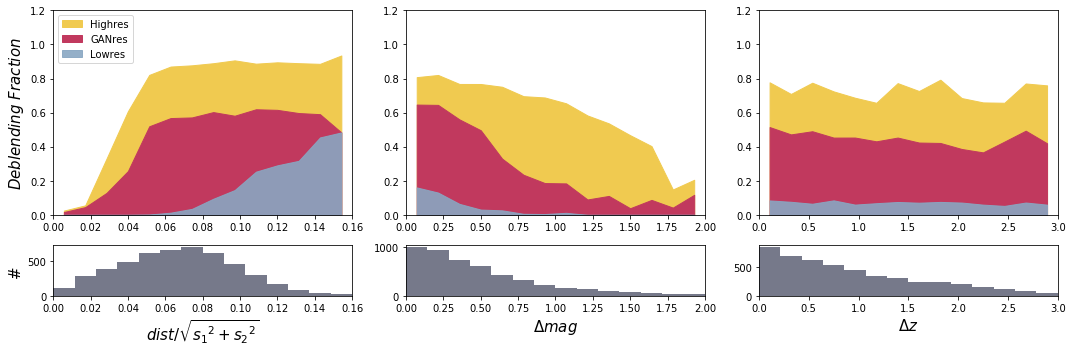

In [5]:
new_par = df['distance']/(np.sqrt(df['s1']**2+df['s2']**2))

f, ((a0,a2,a4), (a1,a3,a5)) = plt.subplots( 2, 3, gridspec_kw={'height_ratios': [4, 1]},figsize=(15,5))

bins = np.linspace(0, 0.16, 15)
digitized = np.digitize(new_par, bins)
bin_means_hi = [np.sum(df[digitized == i]['numhi']==2)/np.sum(df[digitized==i]['numhi']<=2) for i in range(1, len(bins))]
bin_means_low = [np.sum((df[digitized == i]['numlow']==2)&(df[digitized==i]['numhi']<=2))/np.sum(df[digitized==i]['numhi']<=2) for i in range(1, len(bins))]
bin_means_gan = [np.sum((df[digitized == i]['numgan']==2)&(df[digitized==i]['numhi']<=2))/np.sum(df[digitized==i]['numhi']<=2) for i in range(1, len(bins))]
x = bins[1:]-bins[1]/2
a0.fill_between(x,0,bin_means_hi,label='Highres',color='#F0CA50')
a0.fill_between(x,0,bin_means_gan,label='GANres',color='#C1395E',alpha=1.0)
a0.fill_between(x,0,bin_means_low,label='Lowres',color='#89A7C2',alpha=0.9)
a0.legend(loc=2)
#a0.set_xlabel(r'$d(arcsec)/ \sqrt{{s_{1}}^2 +{s_{2}}^2}$',fontsize=15)
a0.set_ylabel(r'$ Deblending\ Fraction$',fontsize=15)
a0.set_ylim([0,1.2])
a0.set_xlim([0,0.16])

a1.hist(new_par,bins=bins,color='#76798a')
a1.set_xlabel(r'$dist/ \sqrt{{s_{1}}^2 +{s_{2}}^2}$',fontsize=15)
a1.set_ylabel(r'#',fontsize=15)
a1.set_xlim([0,0.16])


fmax = np.maximum(np.array(df['flux1']),np.array(df['flux2']))
fmin = np.minimum(np.array(df['flux1']),np.array(df['flux2']))
new_par= np.log10(fmax/fmin)
bins = np.linspace(0, 2, 15)
digitized = np.digitize(new_par, bins)
bin_means_hi = [np.sum(df[digitized == i]['numhi']==2)/np.sum(df[digitized==i]['numhi']<=2) for i in range(1, len(bins))]
bin_means_low = [np.sum((df[digitized == i]['numlow']==2)&(df[digitized==i]['numhi']<=2))/np.sum(df[digitized==i]['numhi']<=2) for i in range(1, len(bins))]
bin_means_gan = [np.sum((df[digitized == i]['numgan']==2)&(df[digitized==i]['numhi']<=2))/np.sum(df[digitized==i]['numhi']<=2) for i in range(1, len(bins))]
x = bins[1:]-bins[1]/2
a2.fill_between(x,0,bin_means_hi,label='Highres',color='#F0CA50')
a2.fill_between(x,0,bin_means_gan,label='GANres',color='#C1395E',alpha=1.0)
a2.fill_between(x,0,bin_means_low,label='Lowres',color='#89A7C2',alpha=0.9)
#a0.set_xlabel(r'$d(arcsec)/ \sqrt{{s_{1}}^2 +{s_{2}}^2}$',fontsize=15)
a2.set_ylim([0,1.2])
a2.set_xlim([0,2])

a3.hist(new_par,bins=bins,color='#76798a')
a3.set_xlabel(r'$\Delta mag$',fontsize=15)
a3.set_xlim([0,2])



new_par= np.abs(df['z1']-df['z2'])
bins = np.linspace(0, 3, 15)
digitized = np.digitize(new_par, bins)
bin_means_hi = [np.sum(df[digitized == i]['numhi']==2)/np.sum(df[digitized==i]['numhi']<=2) for i in range(1, len(bins))]
bin_means_low = [np.sum((df[digitized == i]['numlow']==2)&(df[digitized==i]['numhi']<=2))/np.sum(df[digitized==i]['numhi']<=2) for i in range(1, len(bins))]
bin_means_gan = [np.sum((df[digitized == i]['numgan']==2)&(df[digitized==i]['numhi']<=2))/np.sum(df[digitized==i]['numhi']<=2) for i in range(1, len(bins))]
x = bins[1:]-bins[1]/2
a4.fill_between(x,0,bin_means_hi,label='Highres',color='#F0CA50')
a4.fill_between(x,0,bin_means_gan,label='GANres',color='#C1395E',alpha=1.0)
a4.fill_between(x,0,bin_means_low,label='Lowres',color='#89A7C2',alpha=0.9)

#a0.set_xlabel(r'$d(arcsec)/ \sqrt{{s_{1}}^2 +{s_{2}}^2}$',fontsize=15)
a4.set_ylim([0,1.2])
a4.set_xlim([0,3])

a5.hist(new_par,bins=bins,color='#76798a')
a5.set_xlabel(r'$\Delta z$',fontsize=15)
a5.set_xlim([0,3])

plt.tight_layout()
plt.savefig('../plots/gan_improve_single.png')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in long_scalars
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in long_scalars


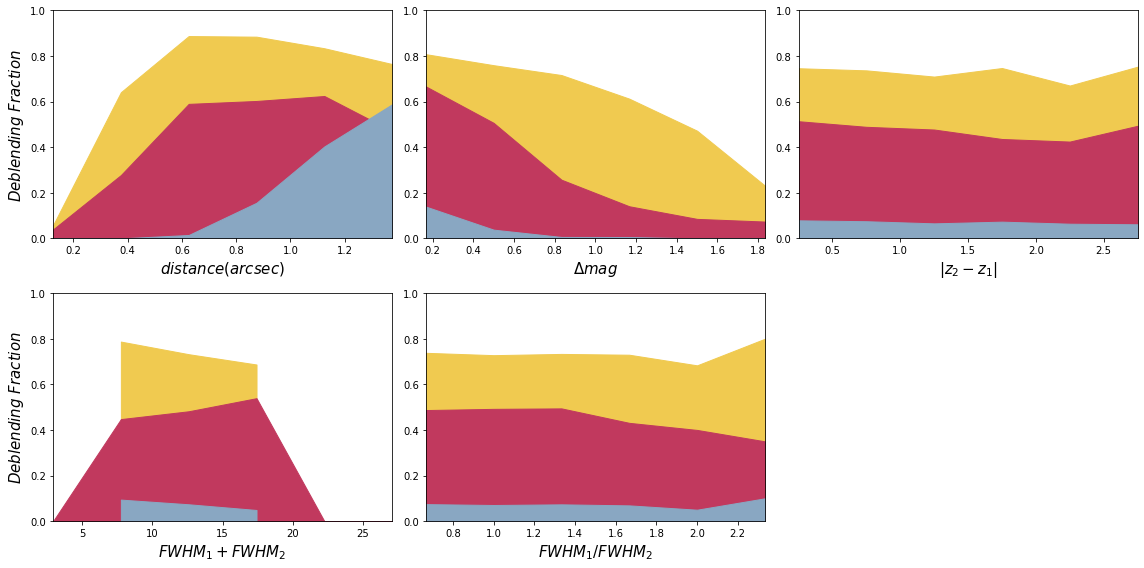

In [7]:
plt.figure(figsize=(16,8))

plt.subplot(2,3,1)
bins = np.linspace(0, 1.5, 7)
digitized = np.digitize(df['distance'], bins)
bin_means_hi = [np.sum(df[digitized == i]['numhi']==2)/np.sum(df[digitized==i]['numhi']<=2) for i in range(1, len(bins))]
bin_means_low = [np.sum((df[digitized == i]['numlow']==2)&(df[digitized==i]['numhi']<=2))/np.sum(df[digitized==i]['numhi']<=2) for i in range(1, len(bins))]
bin_means_gan = [np.sum((df[digitized == i]['numgan']==2)&(df[digitized==i]['numhi']<=2))/np.sum(df[digitized==i]['numhi']<=2) for i in range(1, len(bins))]
x = bins[1:]-bins[1]/2
plt.fill_between(x,0,bin_means_hi,label='Highres',color='#F0CA50')
plt.fill_between(x,0,bin_means_gan,label='GANres',color='#C1395E')
plt.fill_between(x,0,bin_means_low,label='Lowres',color='#89A7C2')
plt.xlabel(r'$distance (arcsec)$',fontsize=15)
plt.ylabel(r'$ Deblending\ Fraction$',fontsize=15)
plt.ylim([0,1])
plt.xlim([x[0],x[-1]])


plt.subplot(2,3,2)
fmax = np.maximum(np.array(df['flux1']),np.array(df['flux2']))
fmin = np.minimum(np.array(df['flux1']),np.array(df['flux2']))
flux_ratio= np.log10(fmax/fmin)
bins = np.linspace(0, 2., 7)
digitized = np.digitize(flux_ratio, bins)
bin_means_hi = [np.sum(df[digitized == i]['numhi']==2)/np.sum(df[digitized==i]['numhi']<=2) for i in range(1, len(bins))]
bin_means_low = [np.sum((df[digitized == i]['numlow']==2)&(df[digitized==i]['numhi']<=2))/np.sum(df[digitized==i]['numhi']<=2) for i in range(1, len(bins))]
bin_means_gan = [np.sum((df[digitized == i]['numgan']==2)/np.sum(df[digitized==i]['numhi']<=2)) for i in range(1, len(bins))]
x = bins[1:]-bins[1]/2
plt.fill_between(x,0,bin_means_hi,label='Highres',color='#F0CA50')
plt.fill_between(x,0,bin_means_gan,label='GANres',color='#C1395E')
plt.fill_between(x,0,bin_means_low,label='Lowres',color='#89A7C2')
plt.xlabel(r'$\Delta mag$',fontsize=15)
#plt.legend(loc=1,fontsize=20)
plt.ylim([0,1])
plt.xlim([x[0],x[-1]])

plt.subplot(2,3,3)
bins = np.linspace(0., 3, 7)
dz = np.abs(df['z1']-df['z2'])
digitized = np.digitize(dz, bins)
bin_means_hi = [np.sum(df[digitized == i]['numhi']==2)/np.sum(df[digitized==i]['numhi']<=2)for i in range(1, len(bins))]
bin_means_low = [np.sum((df[digitized == i]['numlow']==2)&(df[digitized==i]['numhi']<=2))/np.sum(df[digitized==i]['numhi']<=2) for i in range(1, len(bins))]
bin_means_gan = [np.sum((df[digitized == i]['numgan']==2)/np.sum(df[digitized==i]['numhi']<=2)) for i in range(1, len(bins))]
x = bins[1:]-bins[1]/2
plt.fill_between(x,0,bin_means_hi,label='Highres',color='#F0CA50')
plt.fill_between(x,0,bin_means_gan,label='GANres',color='#C1395E')
plt.fill_between(x,0,bin_means_low,label='Lowres',color='#89A7C2')
#plt.legend(fontsize=15,loc=4)
plt.ylim([0,1])
plt.xlim([x[0],x[-1]])

plt.xlabel(r'$|z_{2}-z_{1}|$',fontsize=15)

plt.subplot(2,3,4)
bins = np.linspace(1, 30, 7)
sumsize = (df['s1']+df['s2'])
digitized = np.digitize(sumsize, bins)
bin_means_hi = [np.sum(df[digitized == i]['numhi']==2)/np.sum(df[digitized==i]['numhi']<=2) for i in range(1, len(bins))]
bin_means_low = [np.sum((df[digitized == i]['numlow']==2)&(df[digitized==i]['numhi']<=2))/np.sum(df[digitized==i]['numhi']<=2) for i in range(1, len(bins))]
bin_means_gan = [np.sum((df[digitized == i]['numgan']==2)/np.sum(df[digitized==i]['numhi']<=2)) for i in range(1, len(bins))]
x = bins[1:]-bins[1]/2
plt.fill_between(x,0,bin_means_hi,label='Highres',color='#F0CA50')
plt.fill_between(x,0,bin_means_gan,label='GANres',color='#C1395E')
plt.fill_between(x,0,bin_means_low,label='Lowres',color='#89A7C2')
#plt.legend(fontsize=15,loc=4)
plt.xlabel(r'$FWHM_{1}+FWHM_{2}$',fontsize=15)
plt.ylabel(r'$ Deblending\ Fraction$',fontsize=15)
plt.ylim([0,1])
plt.xlim([x[0],x[-1]])

plt.subplot(2,3,5)
bins = np.linspace(1, 3, 7)
smax = np.maximum(np.array(df['s1']),np.array(df['s2']))
smin = np.minimum(np.array(df['s1']),np.array(df['s2']))
ds=smax/smin
digitized = np.digitize(ds, bins)
bin_means_hi = [np.sum(df[digitized == i]['numhi']==2)/np.sum(df[digitized==i]['numhi']<=2) for i in range(1, len(bins))]
bin_means_low = [np.sum((df[digitized == i]['numlow']==2)&(df[digitized==i]['numhi']<=2))/np.sum(df[digitized==i]['numhi']<=2) for i in range(1, len(bins))]
bin_means_gan = [np.sum((df[digitized == i]['numgan']==2)/np.sum(df[digitized==i]['numhi']<=2)) for i in range(1, len(bins))]
x = bins[1:]-bins[1]/2
plt.fill_between(x,0,bin_means_hi,label='Highres',color='#F0CA50')
plt.fill_between(x,0,bin_means_gan,label='GANres',color='#C1395E')
plt.fill_between(x,0,bin_means_low,label='Lowres',color='#89A7C2')
#plt.legend(fontsize=15,loc=4)
plt.ylim([0,1])
plt.xlim([x[0],x[-1]])

plt.xlabel(r'$FWHM_{1}/FWHM_{2}$',fontsize=15)
plt.tight_layout()

plt.savefig('../plots/deblend_gan.png')


In [8]:
import sompy

sel = flux_ratio<30

dat=np.array([df['distance'][sel],flux_ratio[sel],sumsize[sel],dz[sel]])
#dat=np.array([df['distance'][sel],df['flux1'][sel],df['flux2'][sel],df['s1'][sel],df['s2'][sel],df['z1'][sel],df['z2'][sel]])

data=dat.T
## Training a SOM with PCA initalization
msz0 = 32
msz1 = 24
sm = sompy.SOMFactory.build(data, mapsize=[msz0,msz1], mapshape='planar', lattice='rect', initialization='pca') 
sm.train(n_job=4, shared_memory = 'no')

 Training...
 pca_linear_initialization took: 0.032000 seconds
 Rough training...
 radius_ini: 4.000000 , radius_final: 1.000000, trainlen: 5

 epoch: 1 ---> elapsed time:  0.126000, quantization error: 1.327240

 epoch: 2 ---> elapsed time:  0.118000, quantization error: 1.246016

 epoch: 3 ---> elapsed time:  0.121000, quantization error: 0.995781

 epoch: 4 ---> elapsed time:  0.115000, quantization error: 0.808086

 epoch: 5 ---> elapsed time:  0.120000, quantization error: 0.682168

 Finetune training...
 radius_ini: 1.000000 , radius_final: 1.000000, trainlen: 7

 epoch: 1 ---> elapsed time:  0.118000, quantization error: 0.554856

 epoch: 2 ---> elapsed time:  0.116000, quantization error: 0.511668

 epoch: 3 ---> elapsed time:  0.121000, quantization error: 0.497572

 epoch: 4 ---> elapsed time:  0.117000, quantization error: 0.491372

 epoch: 5 ---> elapsed time:  0.122000, quantization error: 0.488483

 epoch: 6 ---> elapsed time:  0.116000, quantization error: 0.486021

 epo

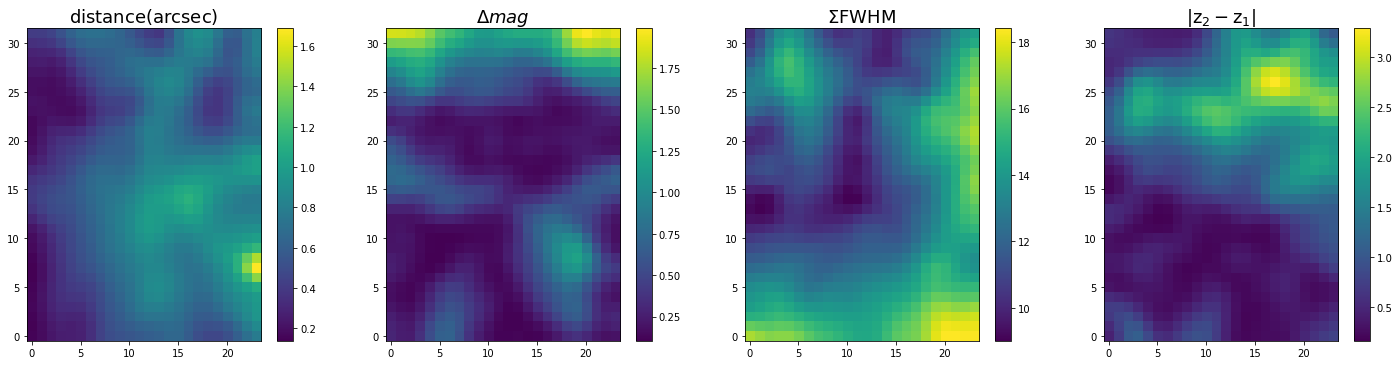

In [11]:
somcol=np.zeros(4,object)
plt.figure(figsize=(20,5))
colors=[r'$\rm distance (arcsec)$','$\Delta mag$',r'$\rm \Sigma FWHM$',r'$\rm |z_{2}-z_{1}|$']

codebook = sm._normalizer.denormalize_by(sm.data_raw,sm.codebook.matrix)    
for ind in range(0,4):
    mp = codebook[:, ind].reshape(sm.codebook.mapsize[0],sm.codebook.mapsize[1])
    plt.subplot(1,4,ind+1)
    ax = plt.gca()
    im=ax.imshow(mp,origin='lower')
    somcol[ind]=np.ndarray.flatten(mp)
    #ax.axis('off')
    plt.title(str(colors[ind]),size=18)
    plt.colorbar(im)


plt.tight_layout()
plt.savefig('../plots/SOM_input.png')

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


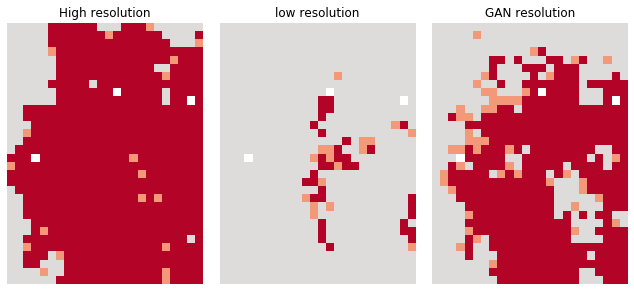

In [10]:
a=sm.bmu_ind_to_xy(sm.project_data(data))
x,y=np.zeros(len(a)),np.zeros(len(a))
k=0
for i in a:
    x[k]=i[0]
    y[k]=i[1]
    k+=1
    
med_l=np.zeros([msz0,msz1])
med_g=np.zeros([msz0,msz1])
med_h=np.zeros([msz0,msz1])

low = df['numlow'][sel]
gan = df['numgan'][sel]
hi = df['numhi'][sel]
for i in range(msz0):
    for j in range(msz1):
        unja=(x==i)&(y==j)
        med_l[i,j]=(np.median(low[unja]))
        med_g[i,j]=(np.median(gan[unja]))
        med_h[i,j]=(np.median(hi[unja]))
        

plt.figure(figsize=(9,4))
plt.subplot(1,3,1)
plt.imshow(med_h,vmin=0,vmax=2,origin='lower',cmap='coolwarm')
plt.title('High resolution')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('low resolution')
plt.imshow(med_l,vmin=0,vmax=2,origin='lower',cmap='coolwarm')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('GAN resolution')
plt.imshow(med_g,vmin=0,vmax=2,origin='lower',cmap='coolwarm')
plt.axis('off')
plt.tight_layout()

plt.savefig('../plots/SOM_blending.png')